In [49]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2


# Load the data to x_train, x_test, y_train, y_test
x_train = pd.read_csv('Dataset/twitter.csv')
x_train = x_train[['neurate','posrate','negrate']]
x_train = x_train.values
print(x_train.shape)
y_train = pd.read_csv('Dataset/twitter.csv')
y_train = y_train[['increaserange']]
y_train = y_train.values
y_train = y_train.reshape(25,)
print(y_train)

(25, 3)
[3 2 2 1 2 3 4 4 3 2 1 2 3 4 4 3 2 1 1 3 3 3 2 0 0]


Epoch 1/10
13/13 [==============================] - 0s 935us/step - loss: 1.6380 - accuracy: 0.1600
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 1.6226 - accuracy: 0.2000
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 1.6135 - accuracy: 0.2400
Epoch 4/10
13/13 [==============================] - 0s 958us/step - loss: 1.6050 - accuracy: 0.3200
Epoch 5/10
13/13 [==============================] - 0s 912us/step - loss: 1.5947 - accuracy: 0.3200
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 1.5878 - accuracy: 0.3200
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 1.5802 - accuracy: 0.3200
Epoch 8/10
13/13 [==============================] - 0s 997us/step - loss: 1.5741 - accuracy: 0.3200
Epoch 9/10
13/13 [==============================] - 0s 916us/step - loss: 1.5696 - accuracy: 0.3200
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 1.5641 - accuracy: 0.3200
dict_keys

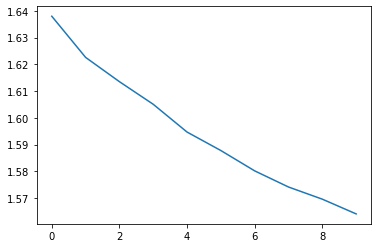

In [81]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
"""
Fit your model to the train set 

This is the part that takes the longest in terms of time and where having GPUs helps. 
Save the return value of the call to `fit` in a variable `history` so we can inspect the training history later.
    
You may want to start by just doing a few epochs.
"""
# Fit 
history = model.fit(x_train,y_train,epochs=10,batch_size=2)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.savefig('loss.png')
# Use the `model.save` function to save the weights. The extension of the file should be a .h5
model.save('fashion_model_new.h5')
model.summary()
result = model.predict(x_train)
print(result)
for i in range(0,20):
    k = np.argmax(result[i])
    print(k+1)